In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Cleaning

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### Making a new column to categorise bmi into "underweight","healthy","overweight","obese"

In [8]:
bmi_labels = ['underweight','healthy','overweight','obese']

In [9]:
df['bmi_category'] = pd.cut(df['bmi'], bins=[0,18.5,25,30,float('inf')], labels=bmi_labels, right=False)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,bmi_category
0,19,female,27.9,0,yes,southwest,16884.92,overweight
1,18,male,33.8,1,no,southeast,1725.55,obese
2,28,male,33.0,3,no,southeast,4449.46,obese
3,33,male,22.7,0,no,northwest,21984.47,healthy
4,32,male,28.9,0,no,northwest,3866.86,overweight


#### Making a new column to categorise age into buckets for easier analysis

In [11]:
age_labels = ['18-25','26-35','36-45','46-55','56+']

In [12]:
df['age_bracket'] = pd.cut(df['age'], bins=[18,26,36,46,56,float('inf')], labels = age_labels, right = False)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,bmi_category,age_bracket
0,19,female,27.9,0,yes,southwest,16884.92,overweight,18-25
1,18,male,33.8,1,no,southeast,1725.55,obese,18-25
2,28,male,33.0,3,no,southeast,4449.46,obese,26-35
3,33,male,22.7,0,no,northwest,21984.47,healthy,26-35
4,32,male,28.9,0,no,northwest,3866.86,overweight,26-35


In [14]:
df.drop_duplicates(inplace = True)

### EDA

#### Age distribution

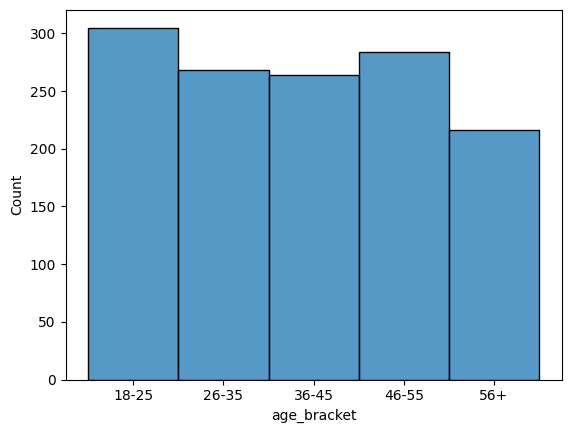

In [15]:
sns.histplot(data=df,x='age_bracket')
plt.show()

#### BMI distribution 

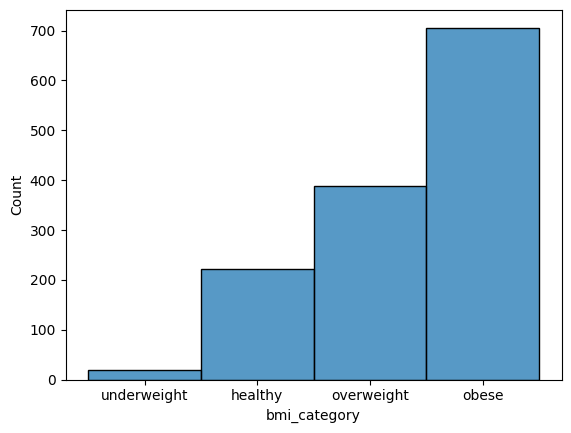

In [16]:
sns.histplot(data=df, x='bmi_category')
plt.show()

#### Gender split

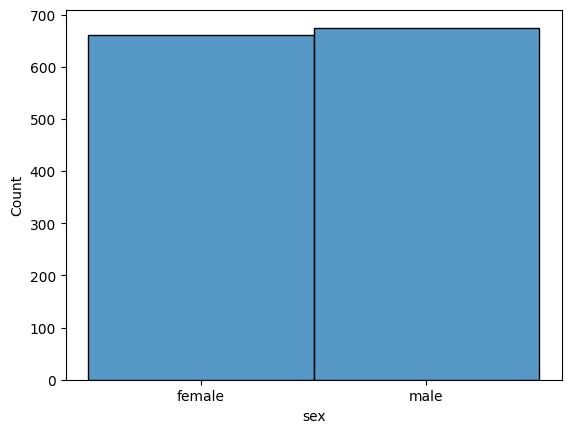

In [17]:
sns.histplot(data=df, x='sex')
plt.show()

#### Smokers vs Non-Smokers

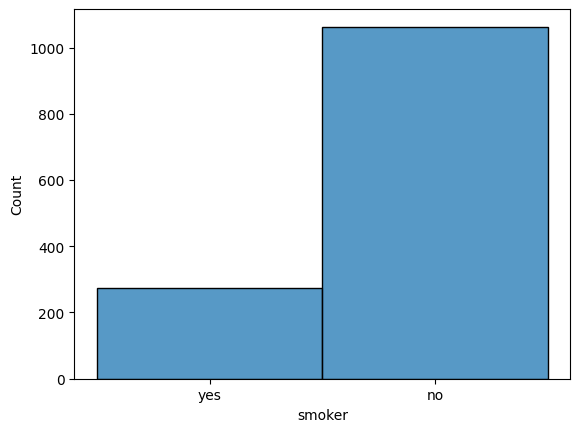

In [18]:
sns.histplot(data=df,x='smoker')
plt.show()

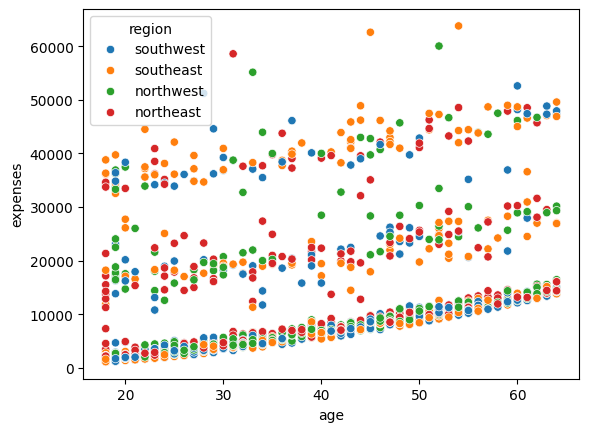

In [19]:
sns.scatterplot(df, x='age',y='expenses',hue='region')
plt.show()

In [20]:
df.to_csv('insurance_data_clean.csv',index=False)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,bmi_category,age_bracket
0,19,female,27.9,0,yes,southwest,16884.92,overweight,18-25
1,18,male,33.8,1,no,southeast,1725.55,obese,18-25
2,28,male,33.0,3,no,southeast,4449.46,obese,26-35
3,33,male,22.7,0,no,northwest,21984.47,healthy,26-35
4,32,male,28.9,0,no,northwest,3866.86,overweight,26-35


#### Converting text columns to numbers

In [22]:
for i in range(df.shape[0]):
    if df.iloc[i,1] =='female':
        df.iloc[i,1] = 1
    else:
        df.iloc[i,1] = 0

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,bmi_category,age_bracket
0,19,1,27.9,0,yes,southwest,16884.92,overweight,18-25
1,18,0,33.8,1,no,southeast,1725.55,obese,18-25
2,28,0,33.0,3,no,southeast,4449.46,obese,26-35
3,33,0,22.7,0,no,northwest,21984.47,healthy,26-35
4,32,0,28.9,0,no,northwest,3866.86,overweight,26-35


In [24]:
for i in range(df.shape[0]):
    if df.iloc[i,4] =='yes':
        df.iloc[i,4] = 1
    else:
        df.iloc[i,4] = 0

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,bmi_category,age_bracket
0,19,1,27.9,0,1,southwest,16884.92,overweight,18-25
1,18,0,33.8,1,0,southeast,1725.55,obese,18-25
2,28,0,33.0,3,0,southeast,4449.46,obese,26-35
3,33,0,22.7,0,0,northwest,21984.47,healthy,26-35
4,32,0,28.9,0,0,northwest,3866.86,overweight,26-35


In [26]:
df.groupby('region')['expenses'].mean()

region
northeast    13406.384691
northwest    12450.840648
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64

In [27]:
df[['age','sex','bmi','children','smoker','expenses']].corr()

,age,sex,bmi,children,smoker,expenses
age,1.000000,0.019814,0.109414,0.041536,-0.025587,0.298308
sex,0.019814,1.000000,-0.046405,-0.017848,-0.076596,-0.058045
bmi,0.109414,-0.046405,1.000000,0.012641,0.003964,0.198637
children,0.041536,-0.017848,0.012641,1.000000,0.007331,0.067389
smoker,-0.025587,-0.076596,0.003964,0.007331,1.000000,0.787234
expenses,0.298308,-0.058045,0.198637,0.067389,0.787234,1.000000


## Building an ML model to predict premium

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,bmi_category,age_bracket
0,19,1,27.9,0,1,southwest,16884.92,overweight,18-25
1,18,0,33.8,1,0,southeast,1725.55,obese,18-25
2,28,0,33.0,3,0,southeast,4449.46,obese,26-35
3,33,0,22.7,0,0,northwest,21984.47,healthy,26-35
4,32,0,28.9,0,0,northwest,3866.86,overweight,26-35


In [30]:
X = df[['age','bmi','children','smoker']]
y = df['expenses']

In [31]:
X.head()

,age,bmi,children,smoker
0,19,27.9,0,1
1,18,33.8,1,0
2,28,33.0,3,0
3,33,22.7,0,0
4,32,28.9,0,0


In [32]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [34]:
lin_reg = LinearRegression()

In [35]:
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_predict_lin_reg = lin_reg.predict(X_test)

In [37]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [38]:
r2_score_lin_reg = r2_score(y_test, y_predict_lin_reg)
rmse_lin_reg = root_mean_squared_error(y_test, y_predict_lin_reg)

In [39]:
print(r2_score_lin_reg)
print(rmse_lin_reg)

0.7942136969767049
5965.104528452179


In [40]:
y_train_pred_lin_reg = lin_reg.predict(X_train)

In [41]:
r2_score_train_lin_reg = r2_score(y_train, y_train_pred_lin_reg)
rmse_train_lin_reg = root_mean_squared_error(y_train, y_train_pred_lin_reg)

In [42]:
print('Training R2:', r2_score_train_lin_reg)
print('Testing R2:', r2_score_lin_reg)

Training R2: 0.7291183070159035
Testing R2: 0.7942136969767049


In [43]:
print('Training RMSE:', rmse_train_lin_reg)
print('Testing RMSE:', rmse_lin_reg)

Training RMSE: 6104.832412164417
Testing RMSE: 5965.104528452179


### Cross Validating

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

In [45]:
r2_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='r2')

In [46]:
print('R2 scores per fold:', r2_scores)
print('Mean R2 score:', np.mean(r2_scores))

R2 scores per fold: [0.76147093 0.70881536 0.77559299 0.73139287 0.75677298]
Mean R2 score: 0.7468090248708774


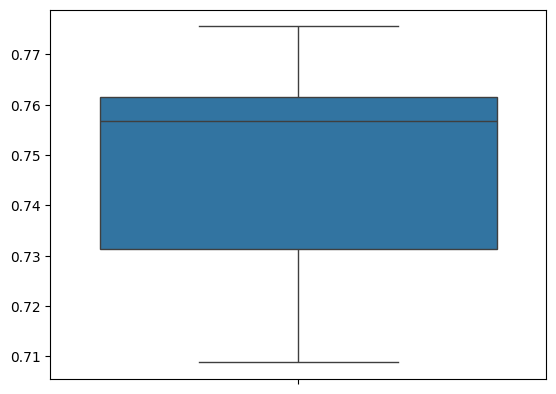

In [47]:
sns.boxplot(y=r2_scores)
plt.show()

#### Trying different models to get the best one

### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [51]:
lasso = Lasso(alpha=0.01)

In [52]:
lasso.fit(X_train_scaled, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [53]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [54]:
r2_score_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)

In [55]:
print(r2_score_lasso)
print(rmse_lasso)

0.7908465774868021
6013.707679194824


#### Trying different alpha values for the model

In [56]:
alpha_values = [0.01,0.05,0.1,0.5,0.75]

In [57]:
r2_scores = []
rmse_values = []

In [58]:
for i in alpha_values:
    lasso = Lasso(alpha = i)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)

    r2_scores.append(r2_score_lasso)
    rmse_values.append(rmse_lasso)

In [59]:
print(r2_scores)
print(rmse_values)

[0.7908465774868021, 0.7908456632494831, 0.7908444369650511, 0.7908346225648915, 0.7908284848411005]
[6013.707679194824, 6013.72082253695, 6013.738451914203, 6013.879544368083, 6013.96777900144]


### Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
decision_tree_regressor = DecisionTreeRegressor(max_depth = 4, max_leaf_nodes = 15)

In [62]:
decision_tree_regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,15
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [64]:
y_pred_dtr = decision_tree_regressor.predict(X_test)

In [65]:
r2_score_train_dtr = r2_score(y_test, y_pred_dtr)
rmse_score_train_dtr = root_mean_squared_error(y_test, y_pred_dtr)

In [66]:
print(r2_score_train_dtr)
print(rmse_score_train_dtr)

0.8841214323174909
4476.219605189411


In [67]:
y_pred_train_dtr = decision_tree_regressor.predict(X_train)

In [68]:
r2_score_test_dtr = r2_score(y_train, y_pred_train_dtr)
rmse_score_test_dtr = root_mean_squared_error(y_train, y_pred_train_dtr)

In [69]:
print('Training R2:', r2_score_train_dtr)
print('Testing R2:', r2_score_test_dtr)

Training R2: 0.8841214323174909
Testing R2: 0.8586207029096952


In [70]:
print('Training RMSE:', rmse_score_train_dtr)
print('Testing RMSE:', rmse_score_test_dtr)

Training RMSE: 4476.219605189411
Testing RMSE: 4410.388304964644


#### Cross Validating 

In [71]:
r2_scores_dtr = cross_val_score(decision_tree_regressor, X,y, cv=5, scoring='r2')

In [72]:
print('R2 scores per fold:', r2_scores_dtr)
print('Mean R2 score:', np.mean(r2_scores_dtr))

R2 scores per fold: [0.87431054 0.78737166 0.88489724 0.83698392 0.86688505]
Mean R2 score: 0.8500896838556604


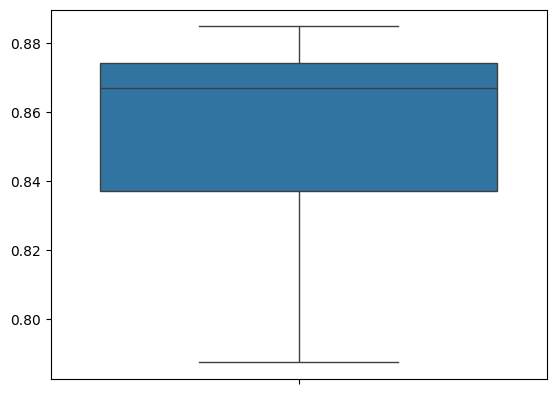

In [73]:
sns.boxplot(y=r2_scores_dtr)
plt.show()

### Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
random_forest = RandomForestRegressor(max_depth=4)

In [76]:
random_forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
y_pred_random_forest = random_forest.predict(X_test)

In [78]:
r2_score_train_rfr = r2_score(y_test, y_pred_random_forest)
rmse_score_train_rfr = root_mean_squared_error(y_test, y_pred_random_forest)

In [79]:
print(r2_score_train_rfr)
print(rmse_score_train_rfr)

0.8838096488945643
4482.237428845356


In [80]:
y_pred_train_rfr = random_forest.predict(X_train)

In [81]:
r2_score_test_rfr = r2_score(y_train, y_pred_train_rfr)
rmse_score_test_rfr = root_mean_squared_error(y_train, y_pred_train_rfr)

In [82]:
print('Training R2:', r2_score_train_rfr)
print('Testing R2:', r2_score_test_rfr)

Training R2: 0.8838096488945643
Testing R2: 0.8665757592537456


In [83]:
print('Training RMSE:', rmse_score_train_rfr)
print('Testing RMSE:', rmse_score_test_rfr)

Training RMSE: 4482.237428845356
Testing RMSE: 4284.51126331023


#### Cross Validating

In [84]:
r2_scores_rfr = cross_val_score(random_forest, X,y, cv=5, scoring='r2')

In [85]:
print('R2 scores per fold:', r2_scores_rfr)
print('Mean R2 score:', np.mean(r2_scores_rfr))

R2 scores per fold: [0.88352464 0.80147271 0.88799134 0.84117083 0.8709288 ]
Mean R2 score: 0.8570176659773917


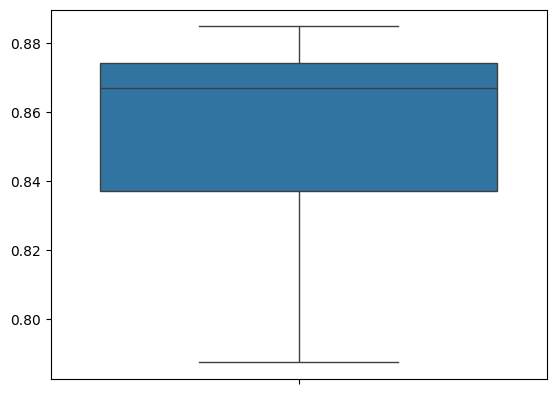

In [86]:
sns.boxplot(y=r2_scores_dtr)
plt.show()